# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook


In [70]:

df_china = pd.read_excel('china.xlsx',skiprows=2)
df_china.columns = ['Year','US Arrivals','CA market share %','CA visitors']
df_china['Year'] = [str(yr) for yr in range(2005,2016)]
df_china = df_china.apply(lambda x: x.str.replace('%',''))
df_china = df_china.apply(lambda x: x.str.replace(',',''))
df_china= df_china.apply(lambda x: x.astype(float))

df_jap = pd.read_excel('jap.xlsx',skiprows=2)
df_jap.rename(columns={'Year':'Year','U.S. Arrivals1':'US Arrivals','Share2':'CA market share %','(est.)':'CA visitors'},inplace=True)
df_jap = df_jap.apply(lambda x: x.str.replace(',',''))
df_jap['Year'] = [str(yr) for yr in range(2005,2016)]
df_jap = df_jap.apply(lambda x: x.str.replace('%',''))
df_jap = df_jap.apply(lambda x: x.astype(float))

df_kor = pd.read_excel('kor.xlsx',skiprows=2)
df_kor.rename(columns={'Year':'Year','Arrivals1':'US Arrivals','Share2':'CA market share %','(est.)':'CA visitors'},inplace=True)
df_kor = df_kor.apply(lambda x: x.str.replace(',',''))
df_kor['Year'] = [str(yr) for yr in range(2005,2016)]
df_kor = df_kor.apply(lambda x: x.str.replace('%',''))
df_kor = df_kor.apply(lambda x: x.astype(float))

df_kor

,Year,US Arrivals,CA market share %,CA visitors
0,2005.0,705093.0,38.6,272000.0
1,2006.0,757721.0,41.3,313000.0
2,2007.0,806175.0,40.9,330000.0
3,2008.0,759394.0,38.2,290000.0
4,2009.0,743846.0,37.9,282000.0
5,2010.0,1107518.0,37.7,417000.0
6,2011.0,1145216.0,34.4,394000.0
7,2012.0,1251432.0,31.0,388000.0
8,2013.0,1359924.0,28.6,389000.0
9,2014.0,1449538.0,27.4,397000.0


<IPython.core.display.Javascript object>


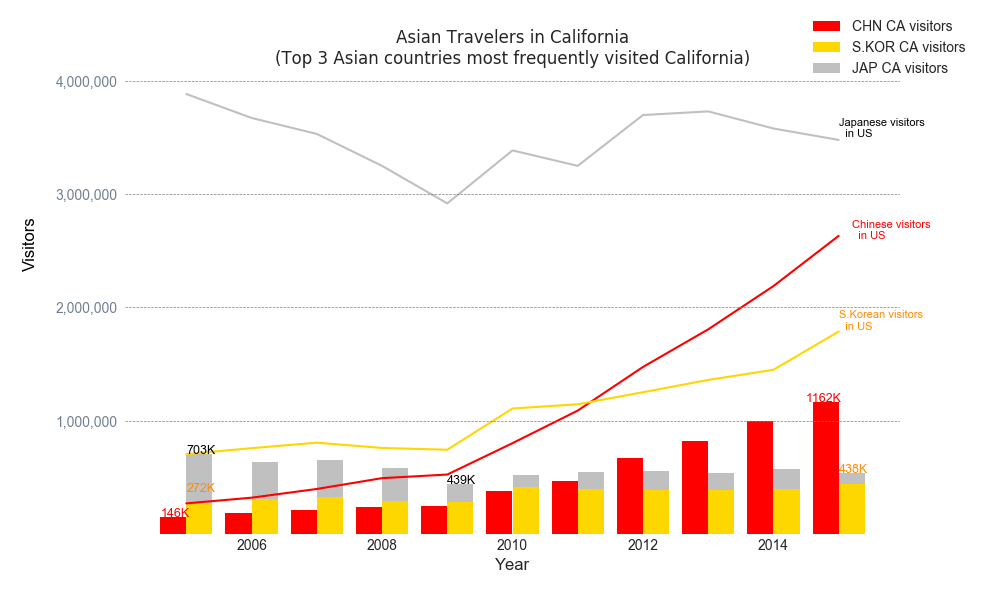

In [146]:

plt.style.use('seaborn-white')
plt.figure(figsize=(10,6))
china_bar =plt.bar(df_china['Year']-0.2,df_china['CA visitors'],label='CHN CA visitors',color='red',align='center',width=0.4)
jap_bar = plt.bar(df_jap['Year']+0.2,df_jap['CA visitors'],label='JAP CA visitors',color='silver',align='center',width=0.4)
kor_bar = plt.bar(df_kor['Year']+0.2,df_kor['CA visitors'],label='S.KOR CA visitors',color='gold',align='center',width=0.4)

plt.plot(df_china['Year'],df_china['US Arrivals'],'red')
plt.plot(df_jap['Year'],df_jap['US Arrivals'],color='silver')
plt.plot(df_kor['Year'],df_kor['US Arrivals'],color='gold')

plt.legend(handles=[china_bar,kor_bar,jap_bar],loc='upper right',bbox_to_anchor=(1.1,1.14))

csfont = {'fontname':'Helvetica'}
plt.title('Asian Travelers in California\n(Top 3 Asian countries most frequently visited California)',size=12,**csfont)
plt.xlabel('Year',size=12)
plt.tick_params(bottom = 'off',left='off',labelleft='off')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.gca().text(2015,3500000,'Japanese visitors\n  in US',color='black',size=8)
plt.gca().text(2015.2,2600000,'Chinese visitors\n  in US',color='red',size=8)
plt.gca().text(2015,1800000,'S.Korean visitors\n  in US',color='darkorange',size=8)

plt.axhline(y=4000000, xmin=0,linewidth=0.5,color='grey',linestyle='--')
plt.axhline(y=3000000,xmin=0,linewidth=0.5,color='grey',linestyle='--')
plt.axhline(y=2000000, xmin=0,linewidth=0.5,color='grey',linestyle='--')
plt.axhline(y=1000000, xmin=0,linewidth=0.5,color='grey',linestyle='--')

plt.text(2003,3950000,'4,000,000',color='slategrey')
plt.text(2003,2950000,'3,000,000',color='slategrey')
plt.text(2003,1950000,'2,000,000',color='slategrey')
plt.text(2003,950000,'1,000,000',color='slategrey')
plt.text(2002.5,2700000,'Visitors',color='black',rotation='vertical',size=12)

plt.text(2005,(np.max(df_jap['CA visitors'])),str(int(np.max(df_jap['CA visitors'])/1000))+'K',size=9,color='black')
plt.text(2009,(np.min(df_jap['CA visitors'])),str(int(np.min(df_jap['CA visitors'])/1000))+'K',size=9,color='black')

plt.text(2014.5,(np.max(df_china['CA visitors'])),str(int(np.max(df_china['CA visitors'])/1000))+'K',size=9,color='red')
plt.text(2004.6,(np.min(df_china['CA visitors'])),str(int(np.min(df_china['CA visitors'])/1000))+'K',size=9,color='red')

plt.text(2015,(np.max(df_kor['CA visitors'])+100000),str(int(np.max(df_kor['CA visitors'])/1000))+'K',size=9,color='darkorange')
plt.text(2005,(np.min(df_kor['CA visitors'])+100000),str(int(np.min(df_kor['CA visitors'])/1000))+'K',size=9,color='darkorange')



In [ ]:
#1. Region and Domain
#State the region and the domain category that your data sets are about.
# California, United States
# Tourism

#2. Research Question
#You must state a question about the domaincategory and region that you identified as being interesting.
# How has the visit to California and United States for travelers from the three asian countries (China, South Korea ,and Japan) change over the last 10 years (from 2005 to 2015)? 

#3. Links
#You must provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to webistes which might have data in tabular form, such as Wikipedia pages.
#http://industry.visitcalifornia.com/media/uploads/files/editor/Visitors%20to%20CA%20from%20South%20Korea%202015%20(Dec%202016).pdf
#http://industry.visitcalifornia.com/media/uploads/files/editor/Visitors%20to%20CA%20from%20China%202015%20(Dec%202016).pdf
#http://industry.visitcalifornia.com/media/uploads/files/editor/Visitors%20to%20CA%20from%20Japan%202015%20(Dec%202016).pdf

#4 Image

#5 Discussion
#You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.
''' "visitcalifornia" was scraped for data concerning the number of visits to California and United States by year for each country.
The original dataset were provided as the form of pdf file so in order to run it in Python efficiently, the format was converted to excel file (xlsx) by using the website "pdftoxls.com". 
The graph above consist of two parts: bar graph and line plot. The bar graph indicates the number of travelers from three Asian countries visited California by years 
and the line plot indicates the number of travelers from the same countries visited the United States by years. 
Also, notice the label above the bar graph which indicates the maximum and the minimum number of travelers who visited California 
so that readers can easily see the number and avoid misleading representations. 
Also for functionality and at the same time for beauty, the color which represents each country was carefully 
chosen since if one color is similar to others, then it may lead for readers to misunderstand the data 
and hard to see it. Red represents China, gold represents South Korea and lastly gray represents Japan. 
The reason why the bar graph was chosen is that the main purpose of this analysis and graph is to show 
the trend of visitors over 10 years. Therefore, I decided to choose stacked bar graph to show three countries 
variations over 10 years.

 In 2005, Chinese travelers who visited California were only 146000 which was the least among other two countries South Korea and Japan. However, as time goes by the travelers who travel not only California but also the United States has markedly increased over ten years and continue growing even now. In 2015, the number of Chinese travelers in California 1162000 which surpass the number of both Korean and Japanese travelers and this number is the third largest number of travelers, following Mexico and Canada.On the contrary, as the graph showing, in the United States including California, Japanese travelers are gradually decreasing over 10 years. The peak of the year was 2005. 703000 travelers visited California which is the largest number among other two countries. Even though it is a downward tendency in general, still the total number of Japanese travelers visited the United States is greater than its Chinese travelers. It can be interpreted as Japanese travelers tend to travel many other states not just only California. As Chinese graphs, South Korea graphs are also showing an upward tendency over ten years, even though the increment is not as large as its Chinese.'''